In [1]:
# Libraries
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style("white")

random.seed(12345)

In [2]:
# Data
before_data = pd.read_csv("../Data/backbone_graphs/before_campaign_backbone.csv", dtype={"source": str, "target": str})
during_data = pd.read_csv("../Data/backbone_graphs/during_campaign_backbone.csv", dtype={"source": str, "target": str})
after_data = pd.read_csv("../Data/backbone_graphs/after_elections_backbone.csv", dtype={"source": str, "target": str})

# Some stats
print("before_data has shape: ", before_data.shape)
print("during_data has shape: ", during_data.shape)
print("after_data has shape: ", after_data.shape)

before_data has shape:  (38209, 4)
during_data has shape:  (56953, 4)
after_data has shape:  (42864, 4)


In [3]:
# Insights
before_data

,source,target,weight,p_value
0,3241806322,29416653,132,3.150182e-51
1,29416653,389131517,38,1.914250e-14
2,29416653,169566296,27,1.061201e-07
3,29416653,1342502335361273856,22,2.116990e-06
4,29416653,3308422191,20,6.992131e-06
...,...,...,...,...
38204,127532707,2301639524,4,4.440879e-02
38205,1489925735401799680,1391451476761923584,4,4.074783e-02
38206,434505068,3005727892,4,4.212454e-02
38207,1586682241,1071557549391011840,4,4.259258e-02


In [4]:
# Reading representatives data
representatives_data = pd.read_csv("../Data/twitter_representatives_handles_final.csv", dtype=str)

# Dropping the first 5 columns
representatives_data = representatives_data.drop(columns=representatives_data.columns[:5])

# Storing IDs and setting them as index
representative_IDs = representatives_data["ids"].tolist()
representatives_data = representatives_data.set_index("ids")

representatives_data.head()

,Name,Twitter-Handle,Party,Gender
ids,,,,
425752285,Bonelli Angelo,AngeloBonelli1,Alleanza Verdi Sinistra,M
417961167,Borrelli Francesco Emilio,NotizieFrance,Alleanza Verdi Sinistra,M
1228450685840220160,Dori Devis,DevisDori,Alleanza Verdi Sinistra,M
1135141640,Evi Eleonora,EleonoraEvi,Alleanza Verdi Sinistra,F
425686235,Fratoianni Nicola,NFratoianni,Alleanza Verdi Sinistra,M


In [5]:
# Creating graphs
before_graph = nx.from_pandas_edgelist(before_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

during_graph = nx.from_pandas_edgelist(during_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

after_graph = nx.from_pandas_edgelist(after_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

# Some stats
print("before_graph has ", before_graph.number_of_nodes(), " nodes and ", before_graph.number_of_edges(), " edges")
print("during_graph has ", during_graph.number_of_nodes(), " nodes and ", during_graph.number_of_edges(), " edges")
print("after_graph has ", after_graph.number_of_nodes(), " nodes and ", after_graph.number_of_edges(), " edges")

before_graph has  12008  nodes and  38209  edges
during_graph has  18150  nodes and  56953  edges
after_graph has  15943  nodes and  42864  edges


In [6]:
# Core decomposition for each graph
before_graph_core = nx.core_number(before_graph)
during_graph_core = nx.core_number(during_graph)
after_graph_core = nx.core_number(after_graph)

In [7]:
# Some stats
print("Degeneracy of before_graph is: ", max(before_graph_core.values()))
print("Degeneracy of during_graph is: ", max(during_graph_core.values()))
print("Degeneracy of after_graph is: ", max(after_graph_core.values()))

Degeneracy of before_graph is:  19
Degeneracy of during_graph is:  25
Degeneracy of after_graph is:  18


In [8]:
# Average core number
print("Average core number of before_graph is: ", round(np.mean(list(before_graph_core.values())),2))
print("Average core number of during_graph is: ", round(np.mean(list(during_graph_core.values())),2))
print("Average core number of after_graph is: ", round(np.mean(list(after_graph_core.values())),2))

Average core number of before_graph is:  3.31
Average core number of during_graph is:  3.29
Average core number of after_graph is:  2.82


In [9]:
# Average core number for representatives
before_core_representatives = {k:v for k,v in before_graph_core.items() if k in representative_IDs}
during_core_representatives = {k:v for k,v in during_graph_core.items() if k in representative_IDs}
after_core_representatives = {k:v for k,v in after_graph_core.items() if k in representative_IDs}

print("Average core number for representatives of before_graph is: ", round(np.mean(list(before_core_representatives.values())),2))
print("Average core number for representatives of during_graph is: ", round(np.mean(list(during_core_representatives.values())),2))
print("Average core number for representatives of after_graph is: ", round(np.mean(list(after_core_representatives.values())),2))

Average core number for representatives of before_graph is:  5.58
Average core number for representatives of during_graph is:  5.8
Average core number for representatives of after_graph is:  4.85


In [10]:
# Maximum core number for representatives
print("Maximum core number for representatives of before_graph is: ", max(before_core_representatives.values()))
print("Maximum core number for representatives of during_graph is: ", max(during_core_representatives.values()))
print("Maximum core number for representatives of after_graph is: ", max(after_core_representatives.values()))

Maximum core number for representatives of before_graph is:  19
Maximum core number for representatives of during_graph is:  25
Maximum core number for representatives of after_graph is:  18


In [11]:
# Deviation of core number
print("Deviation of core number of before_graph is: ", round(np.std(list(before_graph_core.values())),2))
print("Deviation of core number of during_graph is: ", round(np.std(list(during_graph_core.values())),2))
print("Deviation of core number of after_graph is: ", round(np.std(list(after_graph_core.values())),2))

Deviation of core number of before_graph is:  3.85
Deviation of core number of during_graph is:  4.32
Deviation of core number of after_graph is:  3.41


In [12]:
# Deviation core number for representatives
print("Deviation core number for representatives of before_graph is: ", round(np.std(list(before_core_representatives.values())),2))
print("Deviation core number for representatives of during_graph is: ", round(np.std(list(during_core_representatives.values())),2))
print("Deviation core number for representatives of after_graph is: ", round(np.std(list(after_core_representatives.values())),2))

Deviation core number for representatives of before_graph is:  5.43
Deviation core number for representatives of during_graph is:  6.31
Deviation core number for representatives of after_graph is:  5.19


In [13]:
# How many representatives are in the inner-most core of each graph?
degeneracy_before = max(before_graph_core.values())
degeneracy_during = max(during_graph_core.values())
degeneracy_after = max(after_graph_core.values())

representatives_innermost_before = [representatives_data.loc[x].Name for x in representative_IDs if x in before_graph_core.keys() and before_graph_core[x] == degeneracy_before]
representatives_innermost_during = [representatives_data.loc[x].Name for x in representative_IDs if x in during_graph_core.keys() and during_graph_core[x] == degeneracy_during]
representatives_innermost_after = [representatives_data.loc[x].Name for x in representative_IDs if x in after_graph_core.keys() and after_graph_core[x] == degeneracy_after]

print("Number of representatives in the inner-most core of before_graph: ", len(representatives_innermost_before))
print("Number of representatives in the inner-most core of during_graph: ", len(representatives_innermost_during))
print("Number of representatives in the inner-most core of after_graph: ", len(representatives_innermost_after))

print("Names of representatives in the inner-most core of before_graph: ", representatives_innermost_before)
print("Names of representatives in the inner-most core of during_graph: ", representatives_innermost_during)
print("Names of representatives in the inner-most core of after_graph: ", representatives_innermost_after)

Number of representatives in the inner-most core of before_graph:  1
Number of representatives in the inner-most core of during_graph:  1
Number of representatives in the inner-most core of after_graph:  5
Names of representatives in the inner-most core of before_graph:  ['Conte Giuseppe']
Names of representatives in the inner-most core of during_graph:  ['Conte Giuseppe']
Names of representatives in the inner-most core of after_graph:  ['Marattin Luigi', 'Conte Giuseppe', 'Paita Raffaella', 'Calenda Carlo', 'Renzi Matteo']


In [14]:
# Creating a dictionary containing for each core number the nodes that belong to it (it will be useful for the next steps)
before_core_dict = {}
during_core_dict = {}
after_core_dict = {}

for node, core in before_graph_core.items():
    if core not in before_core_dict.keys():
        before_core_dict[core] = [node]
    else:
        before_core_dict[core].append(node)

for node, core in during_graph_core.items():
    if core not in during_core_dict.keys():
        during_core_dict[core] = [node]
    else:
        during_core_dict[core].append(node)
        
for node, core in after_graph_core.items():
    if core not in after_core_dict.keys():
        after_core_dict[core] = [node]
    else:
        after_core_dict[core].append(node)

In [15]:
# Function for plotting the core decomposition of a graph (it colors in red the representatives)
def plot_core_decomposition(core_dict:dict, graph, representative_IDs:list, fname:str):
    # Creating a shell layout s.t. each core is a shell starting from the inner-most core (i.e., the core with the highest core number)
    shells = []
    for core in range(max(core_dict.keys()), 0, -1):
        if core in core_dict.keys():
            shells.append(core_dict[core])

    pos = nx.shell_layout(graph, shells)

    # Coloring nodes of representatives in red
    node_colors = ['red' if node in representative_IDs else 'blue' for node in graph.nodes()]

    # Increasing size of representatives
    node_sizes = [10 if node in representative_IDs else 5 for node in graph.nodes()]

    # Alphas for representatives
    node_alphas = [1 if node in representative_IDs else 0.1 for node in graph.nodes()]

    # Creating a squared figure
    plt.figure(figsize=(5,5))

    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, alpha=node_alphas, node_color=node_colors)

    # Manually add a legend for representatives (red) and non-representatives (blue)
    # plt.plot([],[], 'o', color='red', label='Representatives')
    # plt.plot([],[], 'o', color='blue', label='Non-representatives')

    # Exporting the figure
    plt.axis("off")
    plt.savefig(f"../Plots/{fname}.png", dpi=300, bbox_inches="tight")

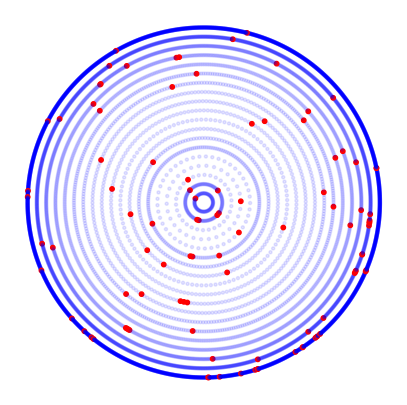

In [16]:
plot_core_decomposition(before_core_dict, before_graph, representative_IDs, 'before_core_decomposition')

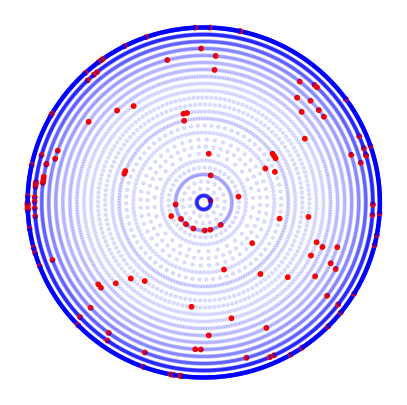

In [17]:
plot_core_decomposition(during_core_dict, during_graph, representative_IDs, 'during_core_decomposition')

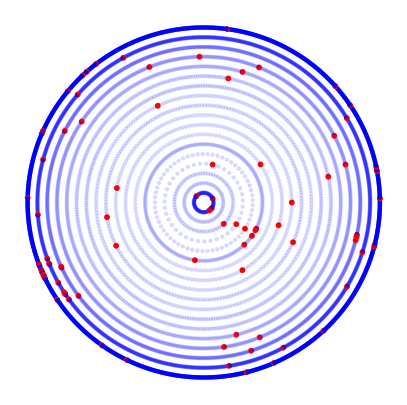

In [18]:
plot_core_decomposition(after_core_dict, after_graph, representative_IDs, 'after_core_decomposition')

### Core decomposition accounting for communities

In [19]:
# Community metadata
before_communities = pd.read_csv("../Data/communities/comms_composition_csv/before_communities.csv", dtype={'user_id':str})
during_communities = pd.read_csv("../Data/communities/comms_composition_csv/during_communities.csv", dtype={'user_id':str})
after_communities = pd.read_csv("../Data/communities/comms_composition_csv/after_communities.csv", dtype={'user_id':str})

representatives_communities = pd.read_csv("../Data/communities/comms_composition_csv/representatives_communities.csv")

# Some stats
print("before_communities has shape: ", before_communities.shape)
print("during_communities has shape: ", during_communities.shape)
print("after_communities has shape: ", after_communities.shape)
print("representatives_communities has shape: ", representatives_communities.shape)

before_communities has shape:  (11844, 5)
during_communities has shape:  (16992, 5)
after_communities has shape:  (14874, 5)
representatives_communities has shape:  (330, 4)


In [20]:
before_communities.head()

,user_id,community_id,comm_label,most_common_party,all_parties
0,1084450777748459520,0,FdI,Fratelli d'Italia,Fratelli d'Italia
1,1524854601295577088,0,FdI,Fratelli d'Italia,Fratelli d'Italia
2,1401427332657713152,0,FdI,Fratelli d'Italia,Fratelli d'Italia
3,1224753522,0,FdI,Fratelli d'Italia,Fratelli d'Italia
4,823182867773669376,0,FdI,Fratelli d'Italia,Fratelli d'Italia


In [21]:
before_communities.shape

(11844, 5)

In [22]:
# For each user, we store its community
before_communities_dict = dict(zip(before_communities.user_id, before_communities.comm_label))
during_communities_dict = dict(zip(during_communities.user_id, during_communities.comm_label))
after_communities_dict = dict(zip(after_communities.user_id, after_communities.comm_label))

# For each user, we store the most_common_party in her/his community
before_communities_dict_most_common_party = dict(zip(before_communities.user_id, before_communities.most_common_party))
during_communities_dict_most_common_party = dict(zip(during_communities.user_id, during_communities.most_common_party))
after_communities_dict_most_common_party = dict(zip(after_communities.user_id, after_communities.most_common_party))

In [23]:
len(before_communities_dict)

11844

In [24]:
before_communities['most_common_party'].unique()

array(["Fratelli d'Italia", 'Movimento 5s', 'Partito Democratico',
       'Azione - Italia Viva', 'Forza Italia', nan], dtype=object)

In [25]:
# Mapping communities to colors
before_communities_names = list(before_communities['comm_label'].unique())
during_communities_names = list(during_communities['comm_label'].unique())
after_communities_names = list(after_communities['comm_label'].unique())

# Merging all communities
all_communities = list(set(before_communities_names + during_communities_names + after_communities_names))
all_communities

['FdI;Az-Iv',
 'M5s',
 'L;Az-Iv',
 'NM;FI;FdI;PD;L',
 'FdI;FI',
 'FdI',
 'NM;FdI',
 'PD;AVS',
 nan,
 'FdI;M5s',
 'PD',
 'PD;Az-Iv',
 'FI',
 'L;FdI',
 'Az-Iv']

In [26]:
# Mapping communities to colors
comm2colors = {'NM;FdI': 'blue',
               'M5s': 'orange',
               'L;FdI': 'blue',
               'PD':'red',
               'L;Az-Iv':'green',
               'FI':'blue',
               'FdI':'blue',
               'PD;AVS':'red',
               'PD;Az-Iv':'magenta',
               'NM;FI;FdI;PD;L':'grey',
               'Az-Iv':'pink',
               'FdI;Az-Iv':'green',
               'FdI;M5s':'brown',
               'FdI;FI':'blue'}

In [27]:
# Mapping communities to colors
before_communities_most_common_names = list(before_communities['most_common_party'].unique())
during_communities_most_common_names = list(during_communities['most_common_party'].unique())
after_communities_most_common_names = list(after_communities['most_common_party'].unique())

# Merging all communities
all_communities_mostcommon = list(set(before_communities_most_common_names + during_communities_most_common_names + after_communities_most_common_names))
all_communities_mostcommon

["Fratelli d'Italia",
 'Forza Italia',
 'Movimento 5s',
 'Lega',
 nan,
 'Azione - Italia Viva',
 'Partito Democratico']

In [28]:
# Mapping communities to colors
# comm2colors_mostcommon = {'Lega': 'green',
#                           'Movimento 5s': 'orange',
#                           'Fratelli d\'Italia': 'blue',
#                           'Partito Democratico':'red',
#                           'Azione - Italia Viva':'magenta',
#                           'Forza Italia':'purple'}

# This one is for coalitions, comment it if you don't need it
comm2colors_mostcommon = {'Lega': 'blue',
                          'Movimento 5s': 'orange',
                          'Fratelli d\'Italia': 'blue',
                          'Partito Democratico':'red',
                          'Azione - Italia Viva':'magenta',
                          'Forza Italia':'blue'}

In [29]:
# Function for plotting the core decomposition of a graph
def plot_core_decomposition_colored(core_dict:dict, graph:nx.DiGraph, comm_dict:dict, color_dict:dict, kcore:dict=None, fname:str="core_decomposition_colored"):
    # Creating a shell layout s.t. each core is a shell starting from the inner-most core (i.e., the core with the highest core number)
    shells = []
    for core in range(max(core_dict.keys()), 0, -1):
        if core in core_dict.keys():
            shells.append(core_dict[core])

    pos = nx.shell_layout(graph, shells)

    # Coloring nodes of representatives in red
    node_colors = [color_dict.get(comm_dict[node], 'white') if node in comm_dict else 'white' for node in graph.nodes()]

    # Increasing size of representatives
    if kcore is not None:
        node_sizes = [kcore[node]*0.5 for node in graph.nodes()]
    else:
        node_sizes = [15 if node in representative_IDs else 1 for node in graph.nodes()]

    # Alphas for representatives
    node_alphas = [1 if node in representative_IDs else 0.6 for node in graph.nodes()]

    # Creating a squared figure
    plt.figure(figsize=(5,5))

    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, alpha=node_alphas, node_color=node_colors)

    # Exporting the figure
    plt.axis("off")
    plt.savefig(f"../Plots/{fname}.png", dpi=300, bbox_inches="tight")

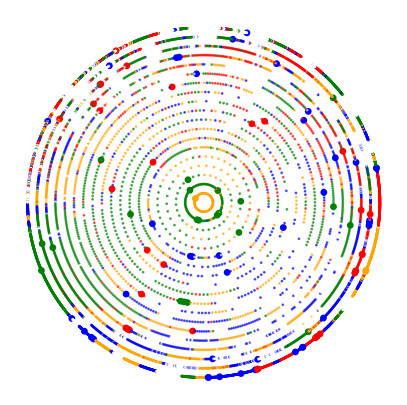

In [30]:
plot_core_decomposition_colored(core_dict=before_core_dict, 
                                  graph=before_graph, 
                                  comm_dict=before_communities_dict, 
                                  color_dict=comm2colors,
                                #   kcore=before_graph_core,
                                  fname="before_core_decomposition_colored_label")

In [31]:
# Representatives with the second-highest core number in the before_graph
innermost_core_2_before = [representatives_data.loc[x].Name for x in representative_IDs if x in before_graph_core.keys() and before_graph_core[x] == degeneracy_before-1]
innermost_core_2_before

['Bonetti Elena',
 'Marattin Luigi',
 'Rosato Ettore',
 'Scalfarotto Ivan',
 'Calenda Carlo',
 'Renzi Matteo']

In [32]:
# Getting also their communities (by first mapping them to their IDs and then to their communities)
# Getting the corresponding IDs of the representatives from representatives_data and their names
innermost_core_2_before_ids = [x for x in representative_IDs if x in before_graph_core.keys() and before_graph_core[x] == degeneracy_before-1]
# Showing also their names
innermost_core_2_before_names = [representatives_data.loc[x].Name for x in innermost_core_2_before_ids]
innermost_core_2_before_communities = [before_communities_dict[x] for x in innermost_core_2_before_ids]
list(zip(innermost_core_2_before_names,innermost_core_2_before_communities))


[('Bonetti Elena', 'L;Az-Iv'),
 ('Marattin Luigi', 'L;Az-Iv'),
 ('Rosato Ettore', 'L;Az-Iv'),
 ('Scalfarotto Ivan', 'L;Az-Iv'),
 ('Calenda Carlo', 'L;Az-Iv'),
 ('Renzi Matteo', 'L;Az-Iv')]

In [33]:
# Counting the occurrences of each party
before_communities['comm_label'].value_counts()

comm_label
L;Az-Iv    2827
M5s        2057
L;FdI      1845
PD;AVS     1832
FdI         406
FI           85
Name: count, dtype: int64

In [34]:
# What about only representatives?
before_communities[before_communities['user_id'].isin(representative_IDs)]['comm_label'].value_counts()

comm_label
PD;AVS     33
L;FdI      30
L;Az-Iv    21
FI          9
M5s         3
FdI         2
Name: count, dtype: int64

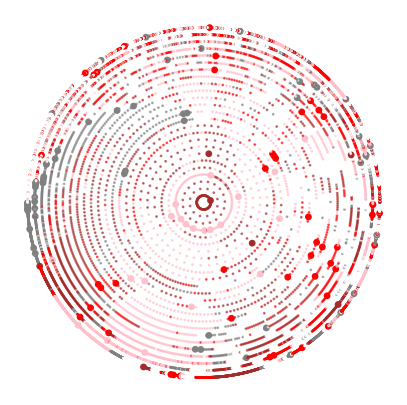

In [35]:
plot_core_decomposition_colored(core_dict=during_core_dict, 
                                graph=during_graph, 
                                comm_dict=during_communities_dict, 
                                color_dict=comm2colors,
                                # kcore=during_graph_core,
                                fname="during_core_decomposition_colored_label")

In [36]:
# Counting the occurrences of each party
during_communities['comm_label'].value_counts()

comm_label
Az-Iv             3942
FdI;M5s           2874
PD;AVS            2700
NM;FI;FdI;PD;L    2568
PD                 478
Name: count, dtype: int64

In [37]:
# Getting also their communities (by first mapping them to their IDs and then to their communities)
# Getting the corresponding IDs of the representatives from representatives_data and their names
innermost_core_1_during_ids = [x for x in representative_IDs if x in during_graph_core.keys() and during_graph_core[x] == degeneracy_during]
# Showing also their names
innermost_core_1_during_names = [representatives_data.loc[x].Name for x in innermost_core_1_during_ids]
innermost_core_1_during_communities = [during_communities_dict[x] for x in innermost_core_1_during_ids]
list(zip(innermost_core_1_during_names,innermost_core_1_during_communities))


[('Conte Giuseppe', 'FdI;M5s')]

In [38]:
# Counting values
from collections import Counter
Counter(during_communities_dict.values())

Counter({nan: 4430,
         'Az-Iv': 3942,
         'FdI;M5s': 2874,
         'PD;AVS': 2700,
         'NM;FI;FdI;PD;L': 2568,
         'PD': 478})

In [39]:
node_colors_test = [comm2colors.get(during_communities_dict[node], 'white') if node in during_communities_dict else 'white' for node in during_graph.nodes()]
Counter(node_colors_test)

Counter({'white': 5588,
         'pink': 3942,
         'red': 3178,
         'brown': 2874,
         'grey': 2568})

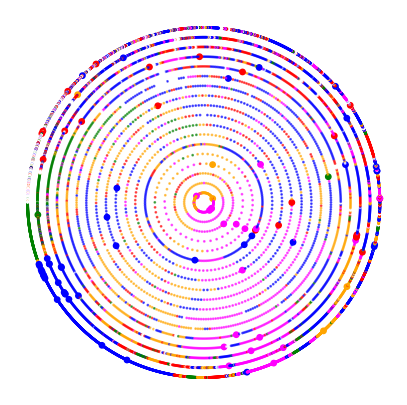

In [40]:
plot_core_decomposition_colored(core_dict=after_core_dict, 
                                graph=after_graph, 
                                comm_dict=after_communities_dict, 
                                color_dict=comm2colors,
                                # kcore=after_graph_core,
                                fname="after_core_decomposition_colored_label")

In [44]:
# Counting the occurrences of each party
after_communities['comm_label'].value_counts()

comm_label
L;FdI        3870
PD;Az-Iv     2435
PD;AVS       2361
FdI;FI       2244
M5s          2065
FdI;Az-Iv    1418
NM;FdI         36
FdI            27
Name: count, dtype: int64

In [45]:
# Getting also their communities (by first mapping them to their IDs and then to their communities)
# Getting the corresponding IDs of the representatives from representatives_data and their names
innermost_core_1_after_ids = [x for x in representative_IDs if x in after_graph_core.keys() and after_graph_core[x] == degeneracy_after]
# Showing also their names
innermost_core_1_after_names = [representatives_data.loc[x].Name for x in innermost_core_1_after_ids]
innermost_core_1_after_communities = [after_communities_dict[x] for x in innermost_core_1_after_ids]
list(zip(innermost_core_1_after_names,innermost_core_1_after_communities))


[('Marattin Luigi', 'PD;Az-Iv'),
 ('Conte Giuseppe', 'M5s'),
 ('Paita Raffaella', 'PD;Az-Iv'),
 ('Calenda Carlo', 'PD;Az-Iv'),
 ('Renzi Matteo', 'PD;Az-Iv')]

### Colors shape most common parties

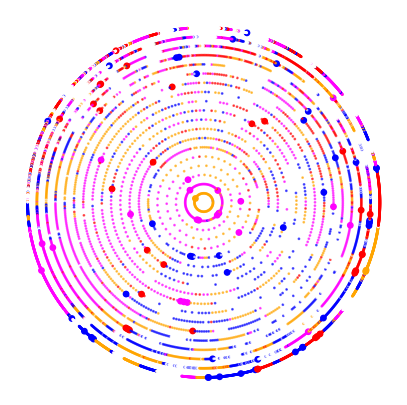

In [41]:
plot_core_decomposition_colored(core_dict=before_core_dict, 
                                graph=before_graph, 
                                comm_dict=before_communities_dict_most_common_party, 
                                color_dict=comm2colors_mostcommon,
                                fname="before_core_decomposition_colored_mostfreq")

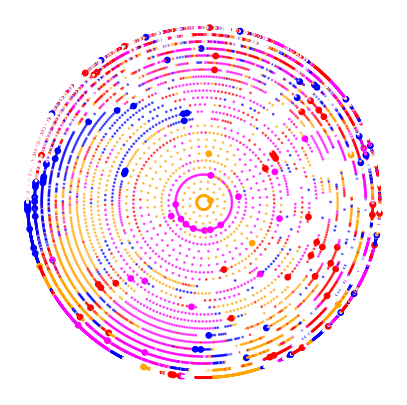

In [42]:
plot_core_decomposition_colored(core_dict=during_core_dict, 
                                graph=during_graph, 
                                comm_dict=during_communities_dict_most_common_party, 
                                color_dict=comm2colors_mostcommon,
                                fname="during_core_decomposition_colored_mostfreq")

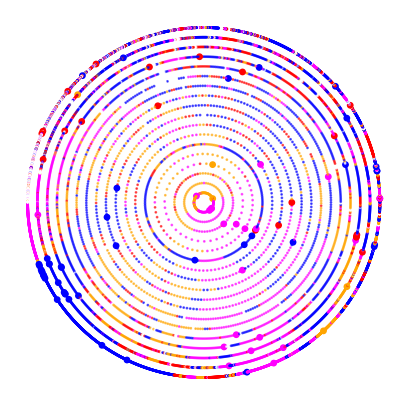

In [43]:
plot_core_decomposition_colored(core_dict=after_core_dict, 
                                graph=after_graph, 
                                comm_dict=after_communities_dict_most_common_party, 
                                color_dict=comm2colors_mostcommon,
                                fname="after_core_decomposition_colored_mostfreq")